In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np

biascube = []
for i in range(1,9):
    biascube.append(fits.getdata("TBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    biascube.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
    
flatfieldcube = []
for i in range(11,20):
    flatfieldcube.append(fits.getdata("TFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

Max Gain: 2.1


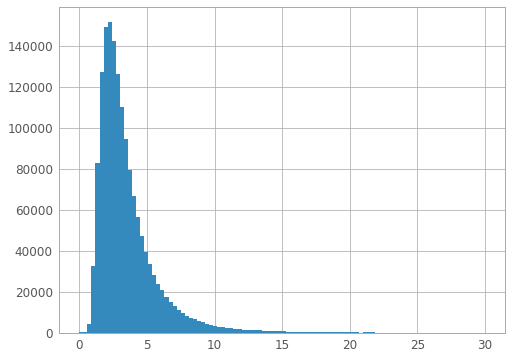

In [55]:
meanBias = np.asarray(biascube).mean(axis = 0)

FlatFieldsubBias = [half - meanBias for half in flatfieldcube]

varFlatField = np.asarray(FlatFieldsubBias).var(axis = 0)
meanFlatField = np.asarray(FlatFieldsubBias).mean(axis = 0)

gain = meanFlatField/varFlatField

n, b, GainHist = plt.hist(gain.flatten(),100,range = (0,30))

maxGain = np.where(n == n.max())
print("Max Gain:", b[maxGain][0])

In [6]:
#Read Noise

varBias = np.asarray(biascube).var(axis = 0)
meanVarBias = np.asarray(varBias).mean()
RN = meanVarBias * b[maxGain]

print("Read Noise:", RN)

Read Noise: [ 69.21685629]


In [24]:
#Linearity

#Biases
Abiascube = []
for i in range(1,9):
    Abiascube.append(fits.getdata("ABias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    Abiascube.append(fits.getdata("ABias000000{}.fit".format(i) , ext=0).astype(np.int))
    
kbiascube = []
for i in range(1,9):
    kbiascube.append(fits.getdata("kBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    kbiascube.append(fits.getdata("kBias000000{}.fit".format(i) , ext=0).astype(np.int))
    
Dbiascube = []
for i in range(1,9):
    Dbiascube.append(fits.getdata("DBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    Dbiascube.append(fits.getdata("DBias000000{}.fit".format(i) , ext=0).astype(np.int))
    
Sbiascube = []
for i in range(1,9):
    Sbiascube.append(fits.getdata("SBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    Sbiascube.append(fits.getdata("SBias000000{}.fit".format(i) , ext=0).astype(np.int))
    
Qbiascube = []
for i in range(1,9):
    Qbiascube.append(fits.getdata("QBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    Qbiascube.append(fits.getdata("QBias000000{}.fit".format(i) , ext=0).astype(np.int))
    
mbiascube = []
for i in range(1,9):
    mbiascube.append(fits.getdata("mBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,10):
    mbiascube.append(fits.getdata("mBias000000{}.fit".format(i) , ext=0).astype(np.int))

#Flat Fields
Aflatfieldcube = []
for i in range(11,20):
    Aflatfieldcube.append(fits.getdata("AFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

kflatfieldcube = []
for i in range(11,20):
    kflatfieldcube.append(fits.getdata("kFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

Dflatfieldcube = []
for i in range(11,20):
    Dflatfieldcube.append(fits.getdata("DFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

Sflatfieldcube = []
for i in range(11,20):
    Sflatfieldcube.append(fits.getdata("SFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

Qflatfieldcube = []
for i in range(11,20):
    Qflatfieldcube.append(fits.getdata("QFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

mflatfieldcube = []
for i in range(11,20):
    mflatfieldcube.append(fits.getdata("mFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

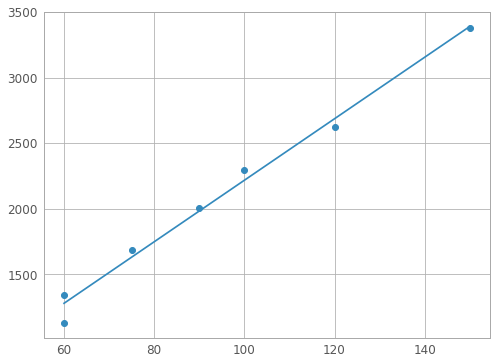

In [25]:
from scipy.optimize import curve_fit

AmeanBias = np.asarray(Abiascube).mean(axis = 0)
kmeanBias = np.asarray(kbiascube).mean(axis = 0)
DmeanBias = np.asarray(Dbiascube).mean(axis = 0)
SmeanBias = np.asarray(Sbiascube).mean(axis = 0)
QmeanBias = np.asarray(Qbiascube).mean(axis = 0)
mmeanBias = np.asarray(mbiascube).mean(axis = 0)

AFlatFieldsubBias = [half - AmeanBias for half in Aflatfieldcube]
kFlatFieldsubBias = [half - kmeanBias for half in kflatfieldcube]
DFlatFieldsubBias = [half - DmeanBias for half in Dflatfieldcube]
SFlatFieldsubBias = [half - SmeanBias for half in Sflatfieldcube]
QFlatFieldsubBias = [half - QmeanBias for half in Qflatfieldcube]
mFlatFieldsubBias = [half - mmeanBias for half in mflatfieldcube]

TAverageFlatField = np.asarray(FlatFieldsubBias).mean()
AAverageFlatField = np.asarray(AFlatFieldsubBias).mean()
kAverageFlatField = np.asarray(kFlatFieldsubBias).mean()
DAverageFlatField = np.asarray(DFlatFieldsubBias).mean()
SAverageFlatField = np.asarray(SFlatFieldsubBias).mean()
QAverageFlatField = np.asarray(QFlatFieldsubBias).mean()
mAverageFlatField = np.asarray(mFlatFieldsubBias).mean()

Averages = np.array([TAverageFlatField, AAverageFlatField, kAverageFlatField,DAverageFlatField,SAverageFlatField,QAverageFlatField,mAverageFlatField])
ExpTimes = np.array([120,90,60,150,75,100,60])

plt.scatter(ExpTimes,Averages)

plt.plot(np.unique(ExpTimes), np.poly1d(np.polyfit(ExpTimes, Averages, 1))(np.unique(ExpTimes)))

In [27]:
#Dark Current

BiasDarkCube20 = []
for i in range(21,22):
    BiasDarkCube20.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
DarkCube20 = []
for i in range(23,24):
    DarkCube20.append(fits.getdata("TDark000000{}.fit".format(i) , ext=0).astype(np.int))
    
BiasDarkCube15 = []
for i in range(25,26):
    BiasDarkCube15.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
DarkCube15 = []
for i in range(27,28):
    DarkCube15.append(fits.getdata("TDark000000{}.fit".format(i) , ext=0).astype(np.int))

BiasDarkCube10 = []
for i in range(30,31):
    BiasDarkCube10.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
DarkCube10 = []
for i in range(32,33):
    DarkCube10.append(fits.getdata("TDark000000{}.fit".format(i) , ext=0).astype(np.int))

BiasDarkCube5 = []
for i in range(34,35):
    BiasDarkCube5.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
DarkCube5 = []
for i in range(36,37):
    DarkCube5.append(fits.getdata("TDark000000{}.fit".format(i) , ext=0).astype(np.int))
    
BiasDarkCube0 = []
for i in range(38,39):
    BiasDarkCube0.append(fits.getdata("TBias000000{}.fit".format(i) , ext=0).astype(np.int))
DarkCube0 = []
for i in range(40,41):
    DarkCube0.append(fits.getdata("TDark000000{}.fit".format(i) , ext=0).astype(np.int))

65.0602628028


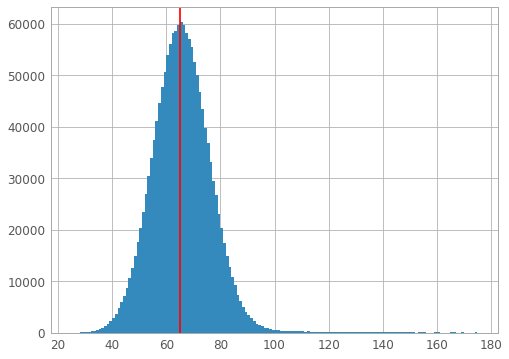

In [90]:
meanBias20 = np.asarray(BiasDarkCube20).mean(axis = 0)
DarksubBias20 = np.asarray([half - meanBias20 for half in DarkCube20]).mean(axis=0)

plt.hist(DarksubBias20.flatten(), 150, range = (25,175))

Restricted20 = DarksubBias20[np.logical_and(DarksubBias20>=-40,DarksubBias20<100)]
Mean20 = np.asarray(Restricted20).mean()
print(Mean20)

plt.axvline(Mean20,color='r')
plt.show()

26.6243654462


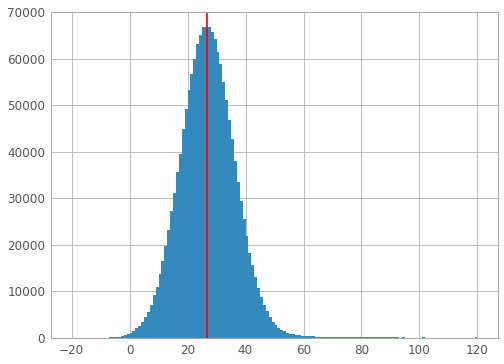

In [89]:
meanBias15 = np.asarray(BiasDarkCube15).mean(axis = 0)
DarksubBias15 = np.asarray([half - meanBias15 for half in DarkCube15]).mean(axis=0)

plt.hist(DarksubBias15.flatten(), 140, range = (-20,120))

Restricted15 = DarksubBias15[np.logical_and(DarksubBias15>=-20,DarksubBias15<120)]
Mean15 = np.asarray(Restricted15).mean()
print(Mean15)

plt.axvline(Mean15,color='r')
plt.show()

11.5501321074


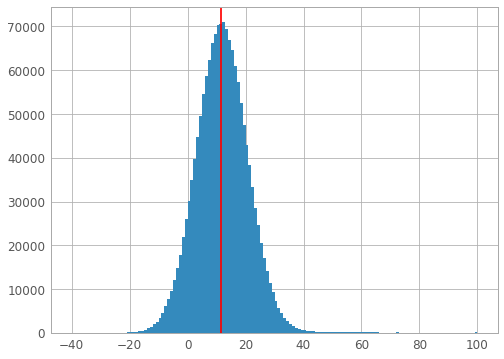

In [82]:
meanBias10 = np.asarray(BiasDarkCube10).mean(axis = 0)
DarksubBias10 = np.asarray([half - meanBias10 for half in DarkCube10]).mean(axis=0)

plt.hist(DarksubBias10.flatten(), 140, range = (-40,100))

Restricted10 = DarksubBias10[np.logical_and(DarksubBias10>=-40,DarksubBias10<100)]
Mean10 = np.asarray(Restricted10).mean()
print(Mean10)

plt.axvline(Mean10,color='r')
plt.show()

4.82321211863


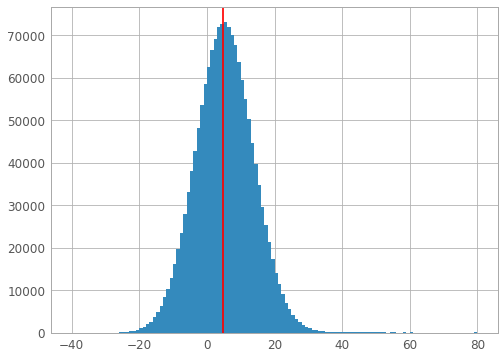

In [86]:
meanBias5 = np.asarray(BiasDarkCube5).mean(axis = 0)
DarksubBias5 = np.asarray([half - meanBias5 for half in DarkCube5]).mean(axis=0)

plt.hist(DarksubBias5.flatten(), 120, range = (-40,80))

Restricted5 = DarksubBias5[np.logical_and(DarksubBias5>=-40,DarksubBias5<80)]
Mean5 = np.asarray(Restricted5).mean()
print(Mean5)

plt.axvline(Mean5,color='r')
plt.show()

11.5501321074


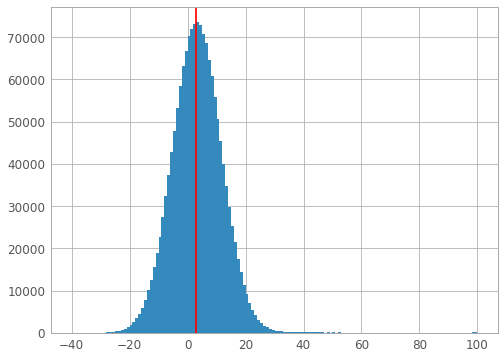

In [84]:
meanBias0 = np.asarray(BiasDarkCube0).mean(axis = 0)
DarksubBias0 = np.asarray([half - meanBias0 for half in DarkCube0]).mean(axis=0)

plt.hist(DarksubBias0.flatten(), 140, range = (-40,100))

Restricted0 = DarksubBias0[np.logical_and(DarksubBias0>=-40,DarksubBias0<100)]
Mean0 = np.asarray(Restricted0).mean()
print(Mean10)

plt.axvline(Mean0,color='r')
plt.show()

A = 0.5, Eg = 0.5, k = 8.617e-05


/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/anaconda/envs/python3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<function matplotlib.pyplot.show>

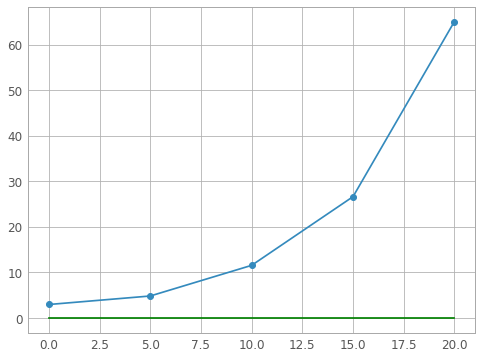

In [100]:
from scipy.optimize import curve_fit 

Means = np.array([Mean20, Mean15, Mean10, Mean5, Mean0])
Temps = np.array([20, 15, 10, 5, 0])

plt.scatter(Temps, Means)

A = 0.5
Eg = 0.5
k = 8.617e-5

def func (T,A,Eg,k):
    return A*T**(3/2)*np.exp(-Eg/(2*k*T))

coeffs, fiterr = curve_fit(func, Temps, Means, p0 = (A, Eg, k))

print ("A = %s, Eg = %s, k = %s" % (coeffs[0],coeffs[1],coeffs[2]))
plt.plot(Temps,Means)
plt.plot(Temps,func(Temps,*coeffs), 'g')
plt.show